# Hotel Bookings

### Project Goal : To classify whether an individual will check-in or cancel a booking.

#### In the recent years, booking cancellation has been a huge revenue loss for the hospitality industry. So, predicting whether a booking is likely to be cancelled will help the hotel managenment to offer certain discounts to the customer to retain customer or be ready to make the booking available for other customers. So, to tackle this issue and get a clear insight of the features influencing booking cancellation various machine learning models such as Logistic Regression, DecisionTree , RandomForest, Gradient  Boosting and Ada Boost techniques have been impemented.

In [2]:
#Data Manipulation
import numpy as np
import pandas as pd
from statistics import mean

#Data Preprocessing
from sklearn.preprocessing import OneHotEncoder

#Data MOdelling Techniques
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split

#Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns
import scikitplot as skplt

#Data Evaluation Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

#Cross Validation
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif, RFE, chi2

### Reading the dataset

##### The Source of the dataset is Kaggle. The datset consists of 119390 records and 32 features(of which 31 are independent and 1 is dependent variable).  

In [3]:
hb_df = pd.read_csv("hotel_bookings.csv")

In [4]:
hb_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hb_df.shape

(119390, 32)

##### Checking for Null values. 
##### The Dataset has 4 variables which consists of null values.
- Removed rows with null values for children, country as there are very few null records.
- Removed company variable from the dataset as it has almost all null values.
- Removed rows with null values for agent as they were mostly unique values.

In [6]:
hb_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

##### Removed few variables depending on the domain knowledge such as meal, reservation status date, arrival week, arrival date as these features will not be useful in classifying whether a hotel room will be booked or cancelled.
##### Removed reservation status as it is just a replica of is_canceled feature which tells whether a booking is cancelled or checked out.

In [7]:
hb_df = hb_df.drop(['company','meal', 'reservation_status', 'reservation_status_date','arrival_date_week_number','arrival_date_day_of_month'], axis=1)

In [8]:
hb_df.shape

(119390, 26)

### Correlation plot
##### To check whether any of the features are highly correlated.

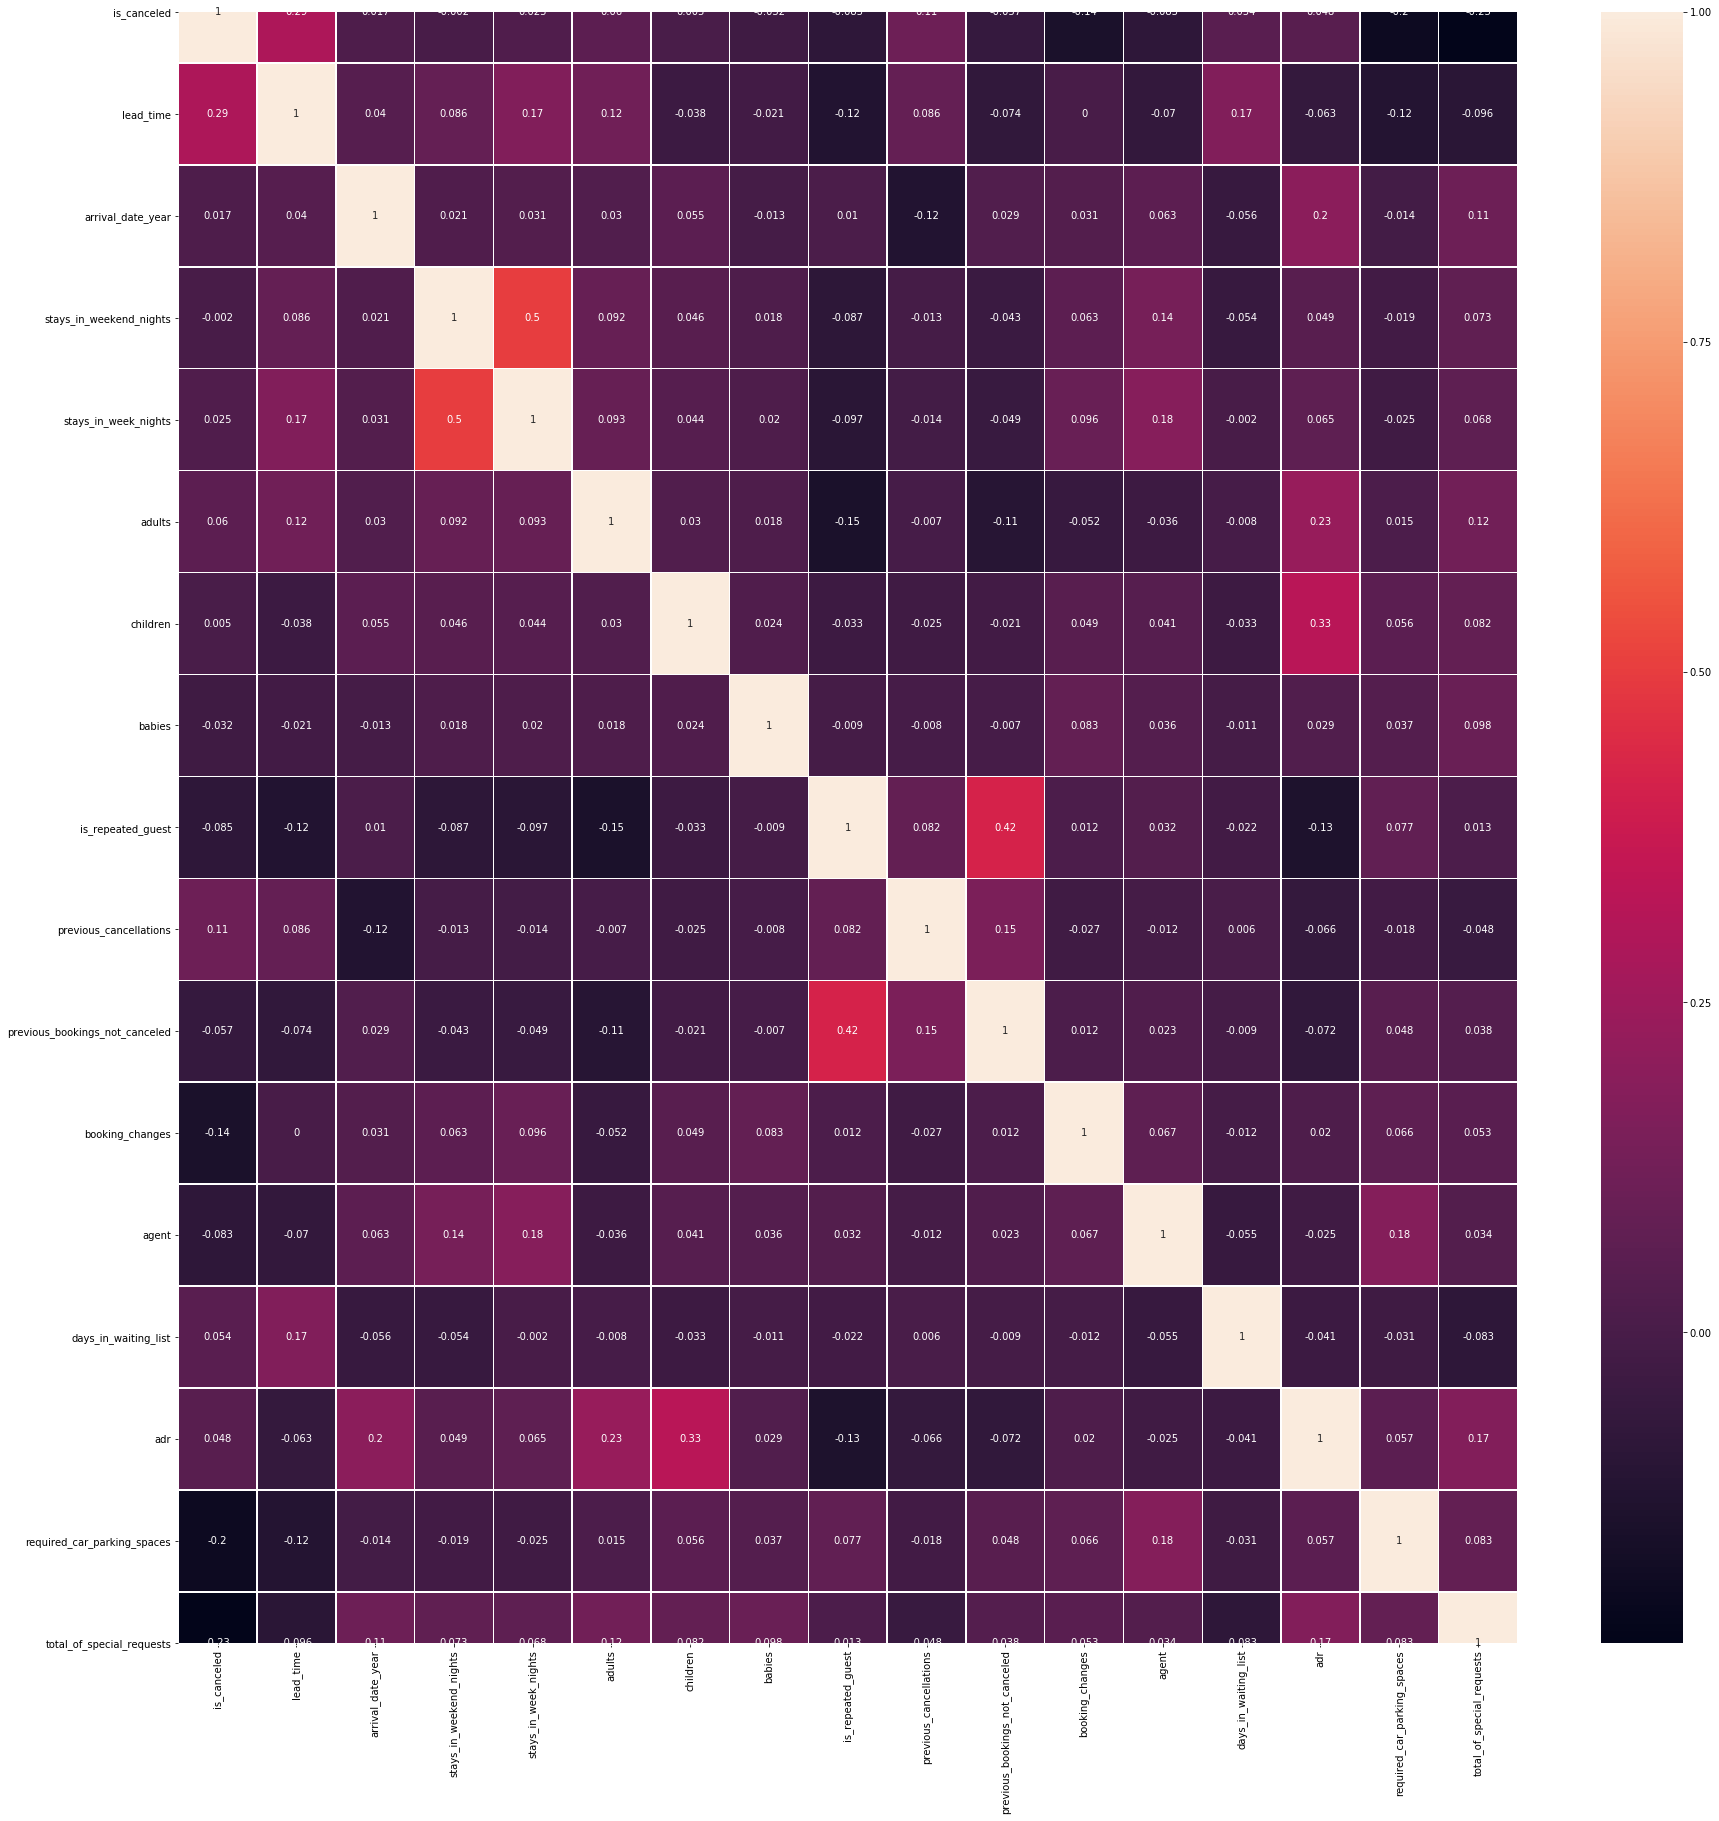

In [9]:
plt.figure(figsize=(30,30))
sns.heatmap(round(hb_df.corr(), 3), linewidth = 0.5, annot= True)

In [10]:
hb_df = hb_df.dropna(subset=['agent','country','children'])

##### Combined two variables children and babies into one variable.

In [11]:
hb_df['children'] = hb_df['children'] + hb_df['babies']

In [12]:
hb_df = hb_df.drop(['babies'], axis=1)

In [13]:
hb_df.shape

(102894, 25)

### Class distribution of the Target Variable.
##### As this is a binary classification checking the ratio of classes and from below it does not seem as an imbalanced dataset.

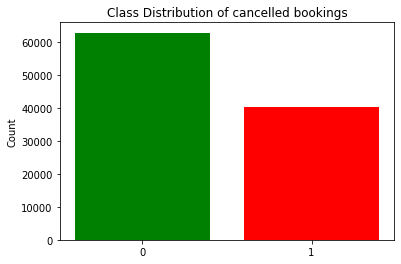

In [14]:
plt.bar(x = hb_df['is_canceled'].value_counts().index, height = hb_df['is_canceled'].value_counts(), color = ['green','red'])
plt.title('Class Distribution of cancelled bookings')
plt.xlabel('')
plt.xticks([0,1])
plt.ylabel('Count')
plt.show()

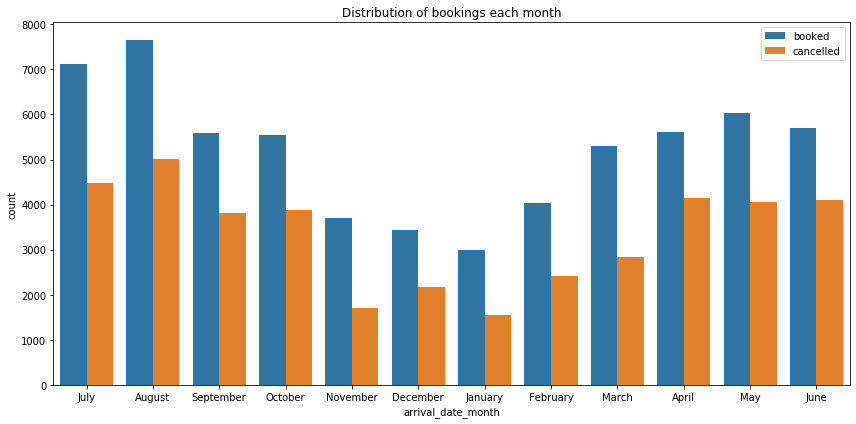

In [16]:
#Countplot to depict bookings of each month
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=hb_df, x='arrival_date_month', hue='is_canceled')
plt.title("Distribution of bookings each month")
plt.legend(labels = ['booked','cancelled'])
plt.tight_layout()

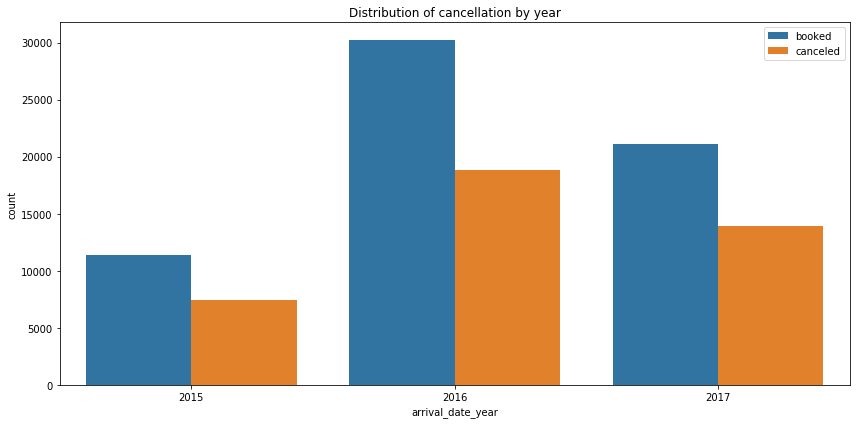

In [17]:
#countplot to depict bookings of the year 2015, 2016 and 2017
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=hb_df, x='arrival_date_year', hue='is_canceled')
plt.title("Distribution of bookings each year")
plt.legend(labels = ['booked','canceled'])
plt.tight_layout()

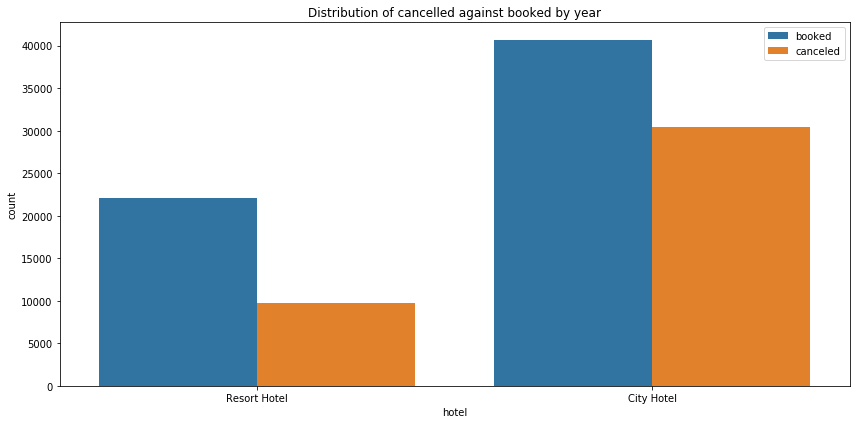

In [16]:
# Couter plot depicting bookings in each hotel type
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=hb_df, x='hotel', hue='is_canceled')
plt.title("Distribution of bookings in each hotel type")
plt.legend(labels = ['booked','canceled'])
plt.tight_layout()

In [17]:
hb_df['country'].value_counts().reset_index(name = 'Count').head(20)

,index,Count
0,PRT,37591
1,GBR,10889
2,FRA,9810
3,ESP,7848
4,DEU,6998
5,ITA,3555
6,IRL,3198
7,BEL,2156
8,BRA,2086
9,USA,1970


In [19]:
top_5_countries = hb_df['country'].value_counts().reset_index(name = 'Count').head(5)['index'].to_list()
t_5_c = hb_df[hb_df['country'].isin(top_5_countries)]

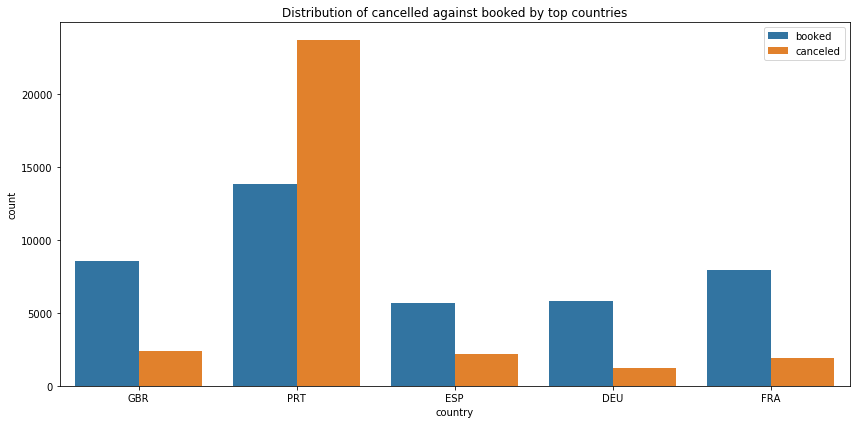

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=t_5_c, x='country', hue='is_canceled')
plt.title("Distribution of cancelled against booked by top countries")
plt.legend(labels = ['booked','canceled'])
plt.tight_layout()

In [21]:
#To reduce the number of dummy variables considered only 6 categories in country variable.
country_list = list(hb_df['country'].unique())
other_country = [x for x in country_list if x not in top_5_countries]
hb_df['country'].replace(to_replace = other_country, value = 'others', inplace = True)
hb_df['country'].value_counts()

PRT       37591
others    29758
GBR       10889
FRA        9810
ESP        7848
DEU        6998
Name: country, dtype: int64

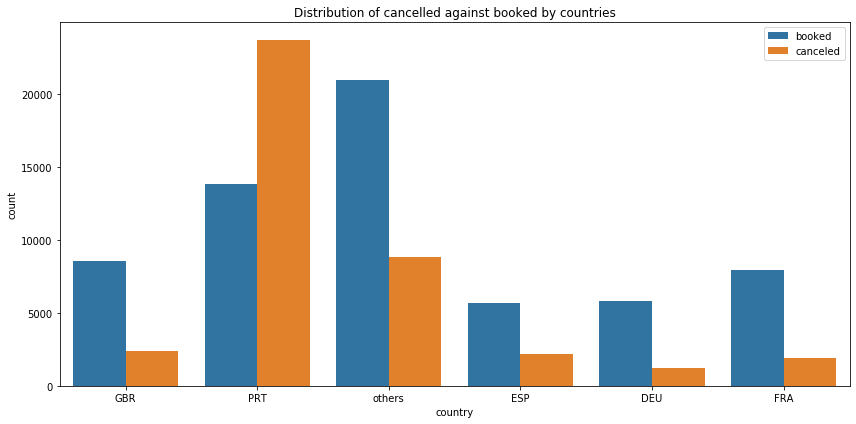

In [22]:
#Count plot depicting bookings made in each country
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=hb_df, x='country', hue='is_canceled')
plt.title("Distribution of cancelled against booked by countries")
plt.legend(labels = ['booked','canceled'])
plt.tight_layout()

## Data Modelling

In [23]:
# seperating Dependent and independent variables
hotel_data_X = hb_df.drop(['is_canceled'], axis = 1) 
hotel_data_Y = hb_df['is_canceled']

In [24]:
categorical_variables = hotel_data_X.columns[hotel_data_X.dtypes == 'object'].to_list()
categorical_variables.append('arrival_date_year')
categorical_variables

['hotel',
 'arrival_date_month',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'arrival_date_year']

In [25]:
#Creating dummy variables of the categorical variables
dummies_df = pd.get_dummies(hotel_data_X[categorical_variables])
hotel_data_X = hotel_data_X.drop(categorical_variables, axis = 1)
hotel_data_X = pd.concat([hotel_data_X, dummies_df], axis = 1)
hotel_data_X['children'] = hotel_data_X['children'].astype('int64')

In [26]:
hotel_data_X.shape

(102894, 71)

In [27]:
hotel_data_X.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
3,13,0,1,1,0,0,0,0,0,304.0,...,0,0,0,1,0,0,0,0,1,0
4,14,0,2,2,0,0,0,0,0,240.0,...,0,0,0,1,0,0,0,0,1,0
5,14,0,2,2,0,0,0,0,0,240.0,...,0,0,0,1,0,0,0,0,1,0
7,9,0,2,2,0,0,0,0,0,303.0,...,0,0,0,1,0,0,0,0,1,0
8,85,0,3,2,0,0,0,0,0,240.0,...,0,0,0,1,0,0,0,0,1,0


In [28]:
# A function which takes in independent variables, dependent variables and Machine learning Model which returns the model
#evaluation metrics and feature importance.
def model(X,Y,clf, clf_name, f_i = True, lo_re = False):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X ,Y ,test_size = 0.3, stratify = Y, random_state = 555)
    
    clfit     = clf.fit(X_train, Y_train)
    predicted = clfit.predict(X_test)
    
    accuracy  = round(accuracy_score(Y_test, predicted),4)*100
    con_mat   = confusion_matrix(Y_test, predicted)
    
    print(clf_name + ":\n\n" + "Accuracy Score : " + str(accuracy) + "%")
    print("\nConfusion Matrix : \n" + str(con_mat))
    
    if f_i:
        importance  = clfit.feature_importances_
    elif lo_re :
        importance = clfit.coef_.flatten()
        
    sort_index = np.argsort(importance)
    plt.figure(figsize=(10,50))
    plt.title('Coefficients Of ' + clf_name)
    plt.barh(range(len(importance)), importance[sort_index], align='center')
    plt.yticks(np.arange(len(X_train.columns)), X_train.columns[sort_index])
    
    plot_confusion_matrix(clf, X_test, Y_test, normalize= 'true')
    plt.title("Confusion Matrix")
    
    plt.tight_layout()
    plt.show()

Logistic Regression:

Accuracy Score : 78.07%

Confusion Matrix : 
[[16791  2029]
 [ 4741  7308]]


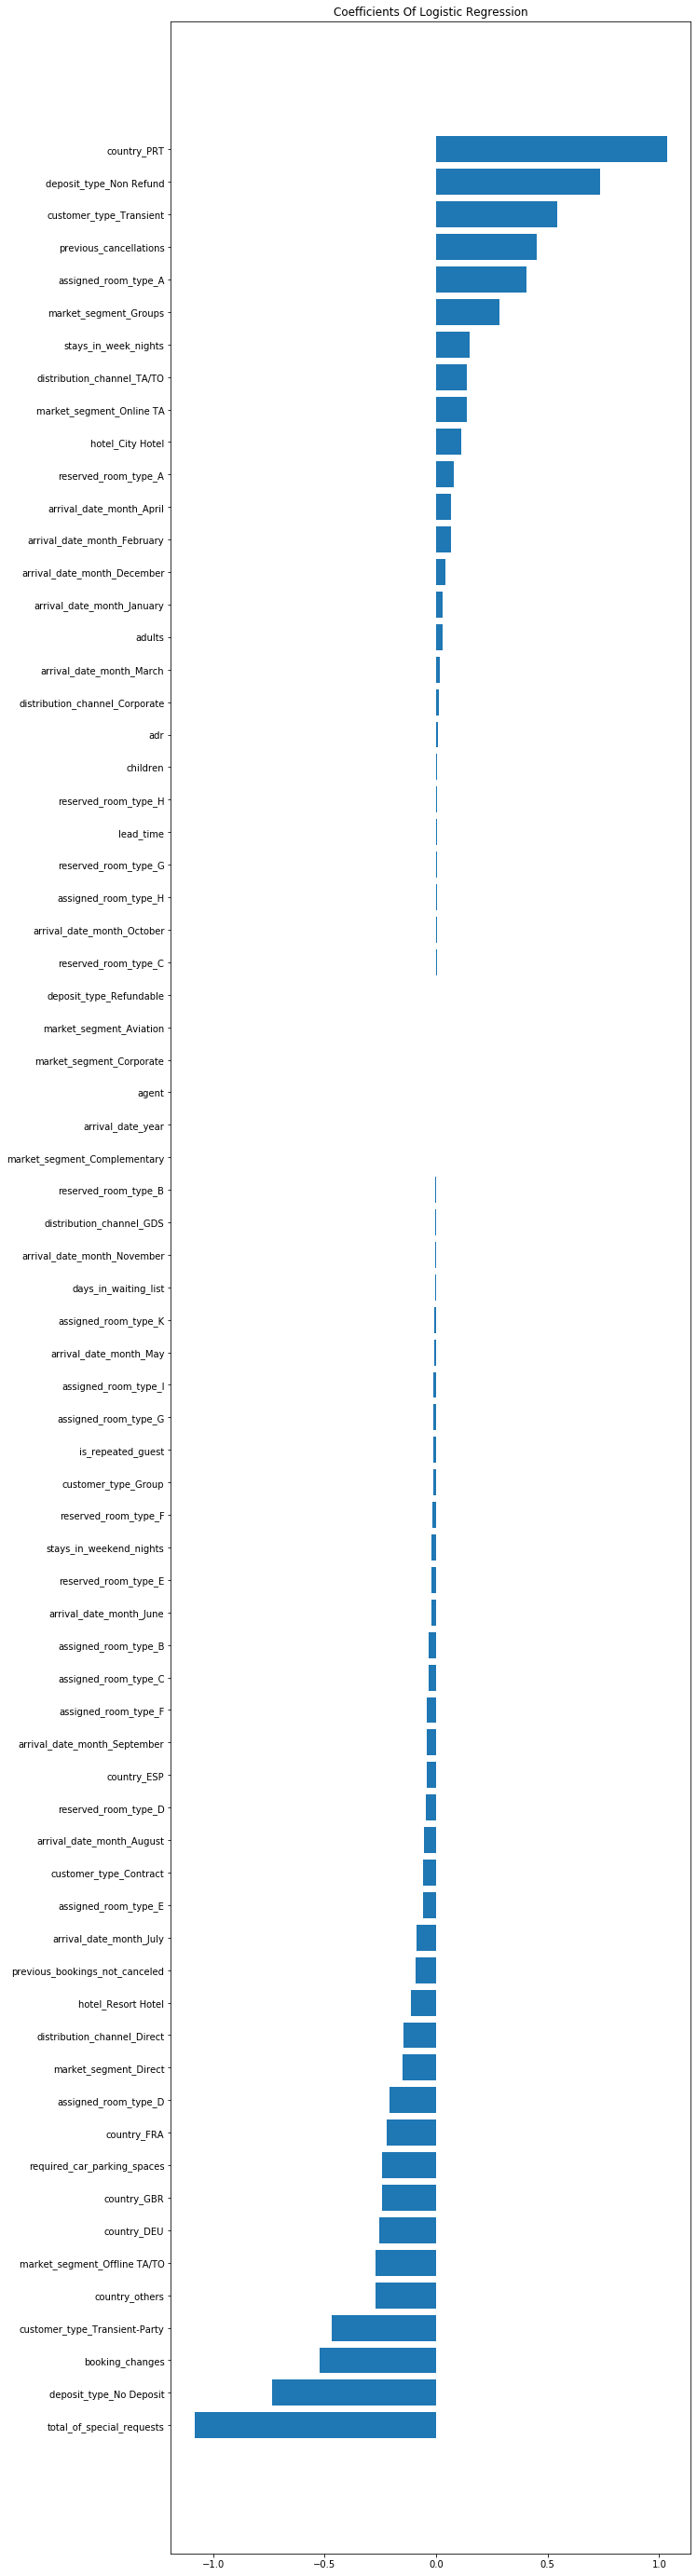

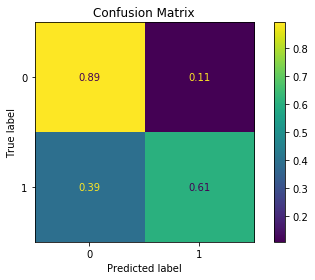

In [29]:
#Building a Logistic Regression Model
model(hotel_data_X,hotel_data_Y,LogisticRegression(),'Logistic Regression', f_i = False,lo_re = True)

Decision Tree:

Accuracy Score : 84.71%

Confusion Matrix : 
[[16390  2430]
 [ 2291  9758]]


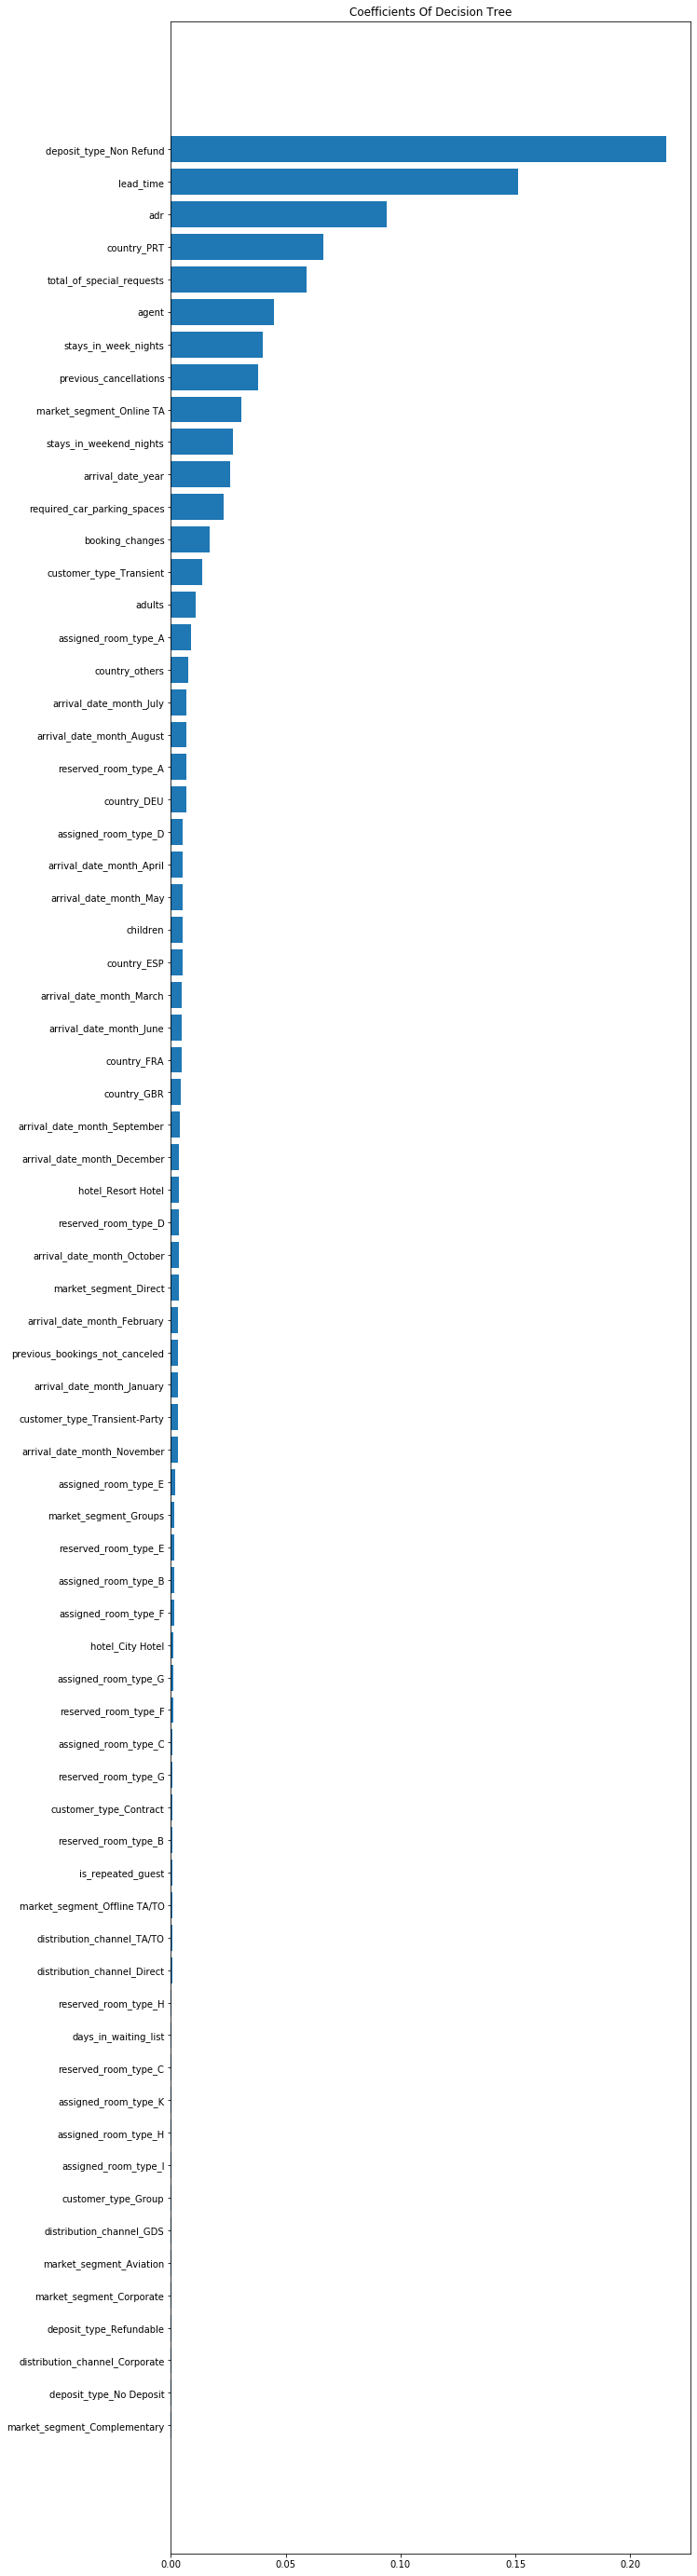

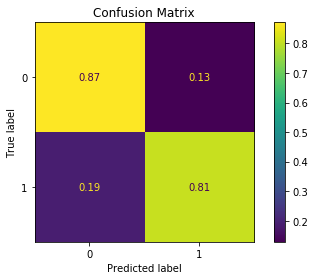

In [30]:
#Building a Decision Tree classifier
model(hotel_data_X,hotel_data_Y,DecisionTreeClassifier(),"Decision Tree", f_i = True)

Random Forest:

Accuracy Score : 88.67%

Confusion Matrix : 
[[17422  1398]
 [ 2100  9949]]


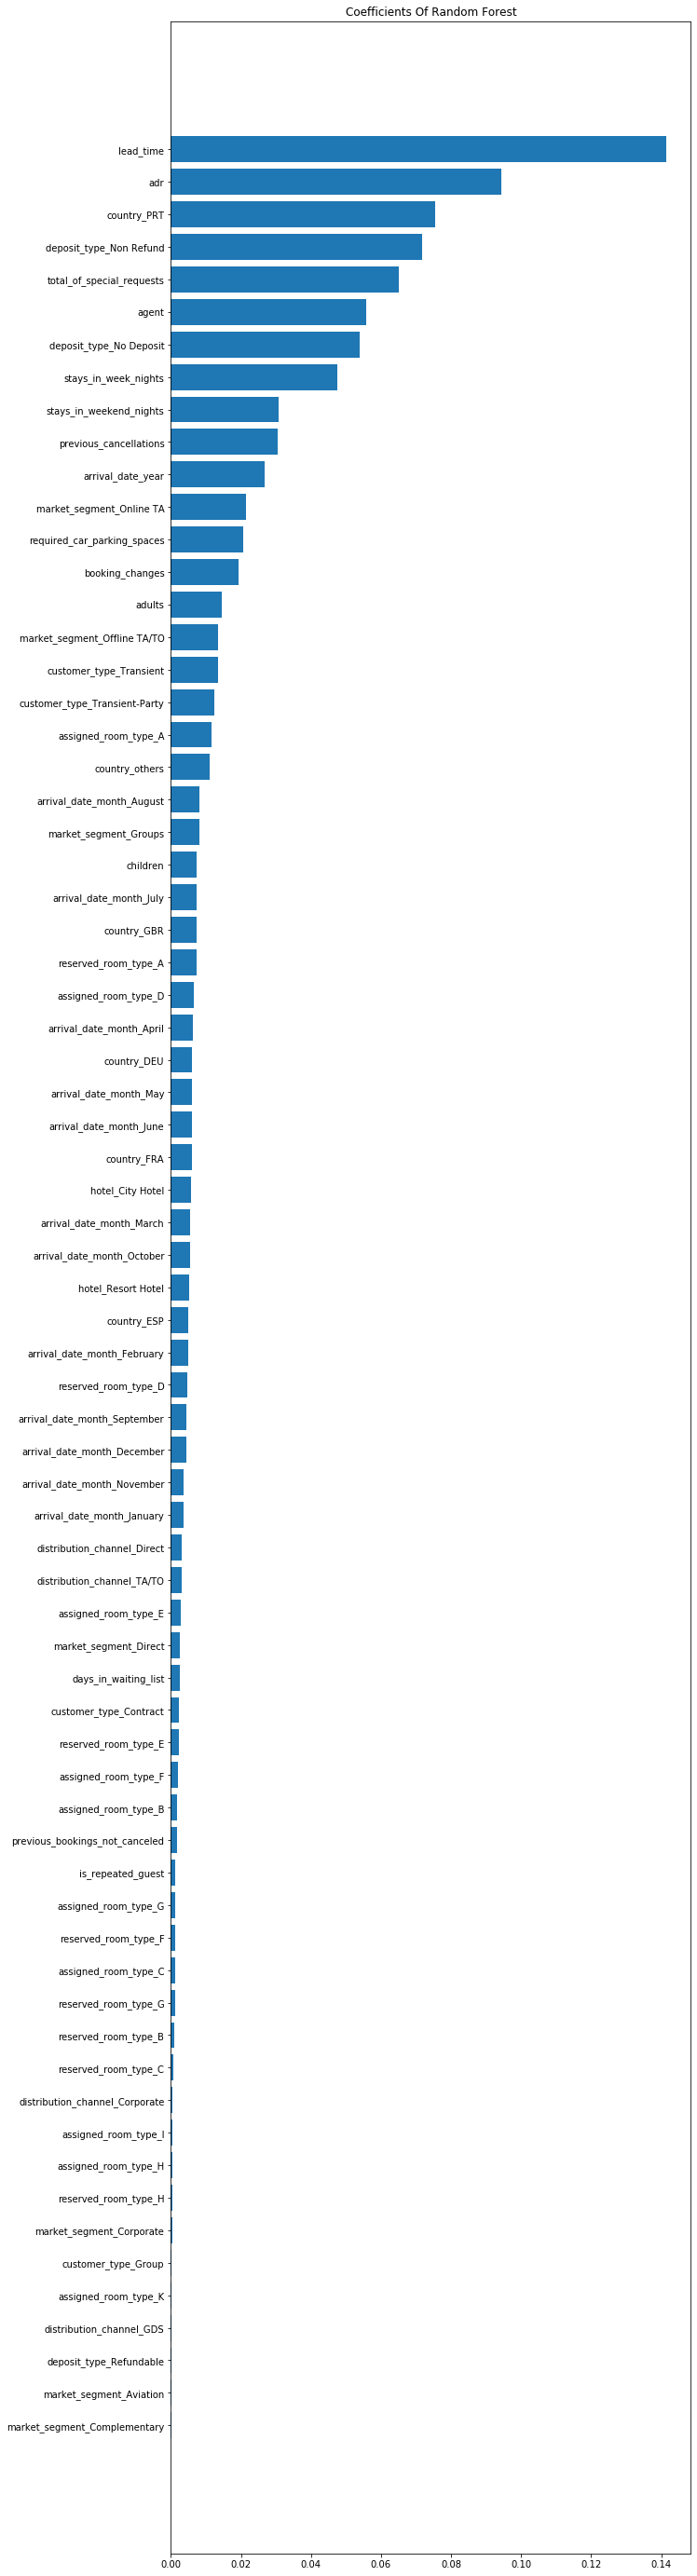

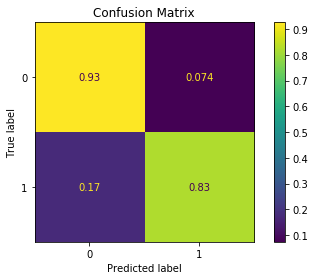

In [31]:
#Building a Random Forest Classifier
model(hotel_data_X,hotel_data_Y,RandomForestClassifier(),"Random Forest", f_i = True)

Gradient Boost:

Accuracy Score : 84.45%

Confusion Matrix : 
[[17158  1662]
 [ 3138  8911]]


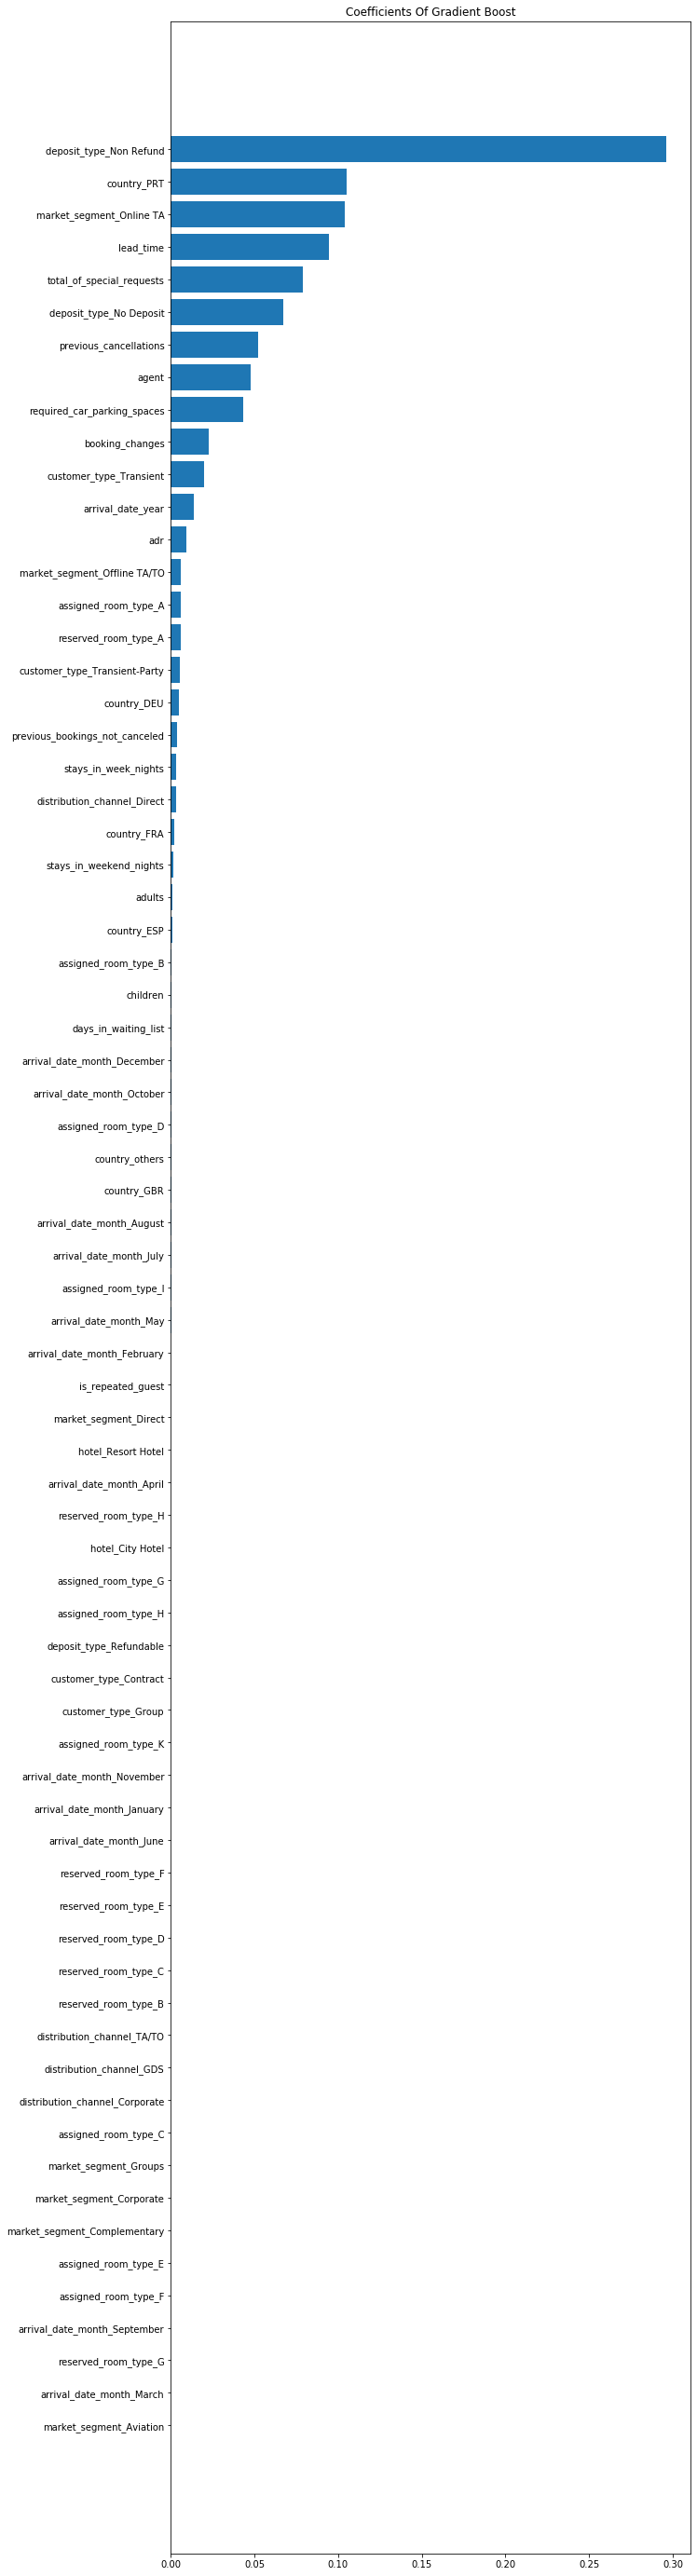

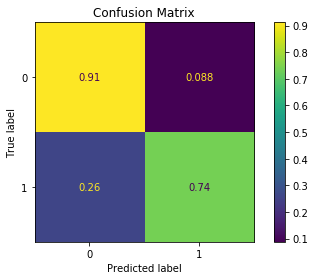

In [32]:
# Building a Gradient Boosting classifier
model(hotel_data_X,hotel_data_Y,GradientBoostingClassifier(),"Gradient Boost", f_i = True)

Ada Boost:

Accuracy Score : 82.41000000000001%

Confusion Matrix : 
[[17009  1811]
 [ 3619  8430]]


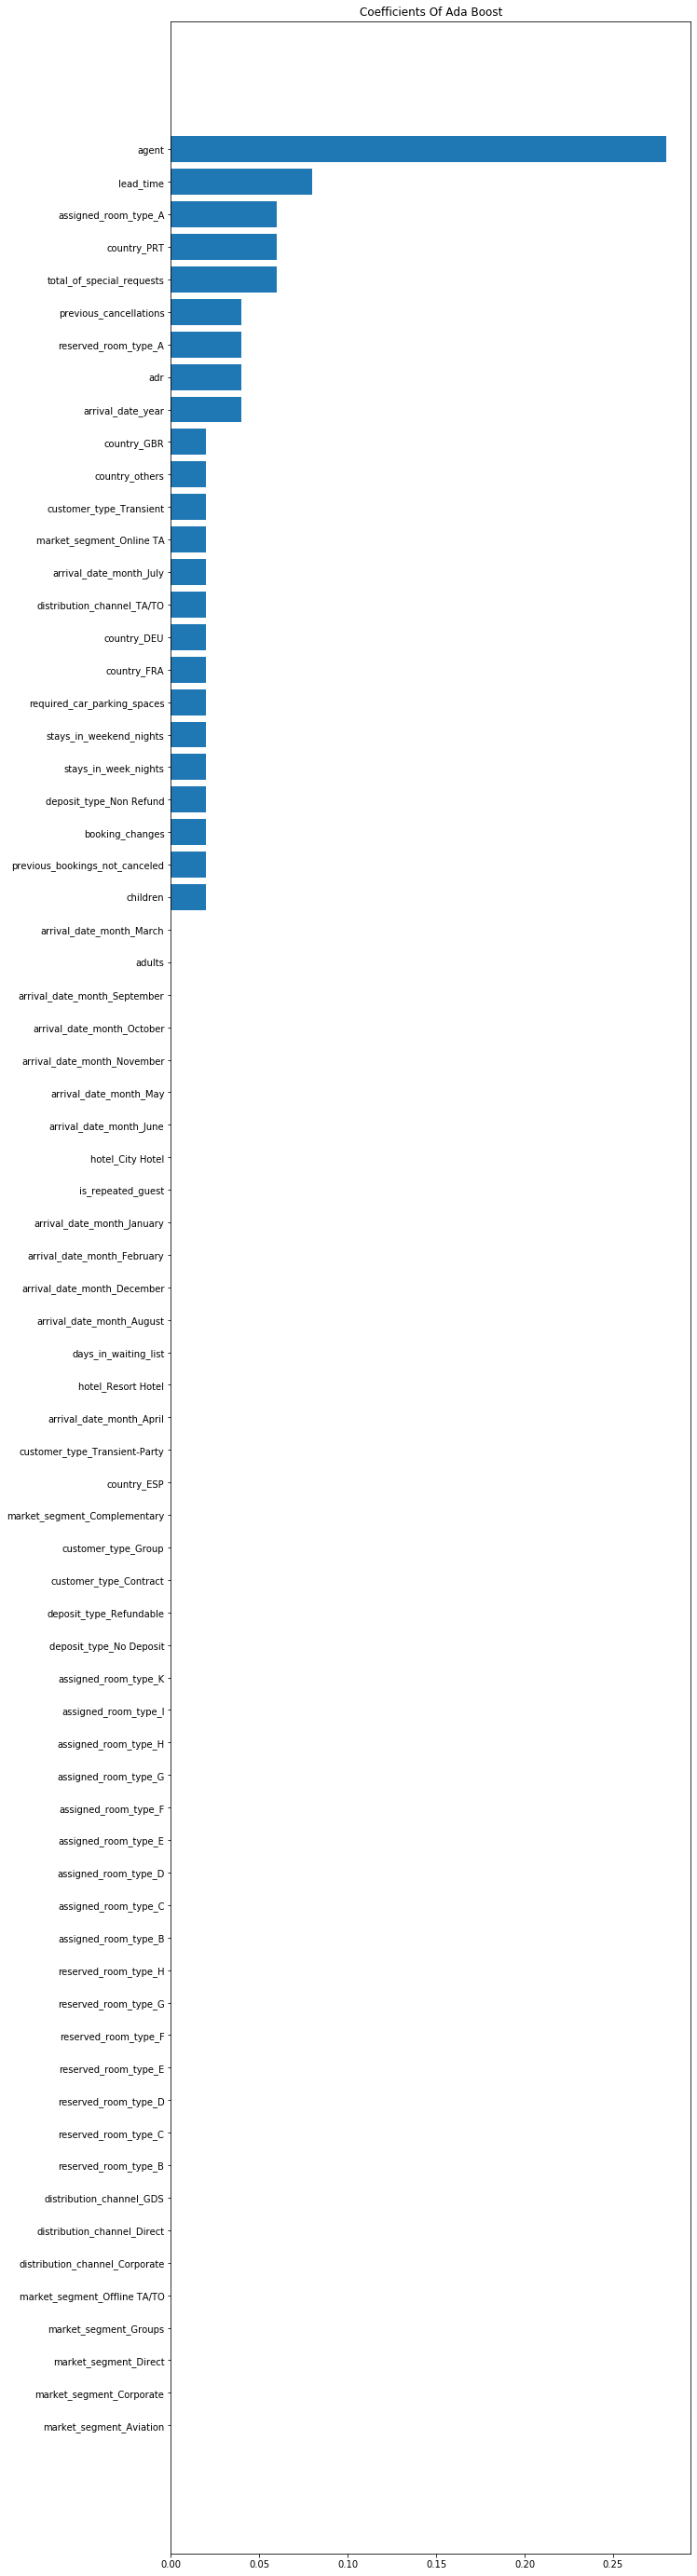

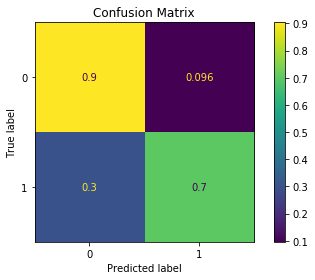

In [33]:
#Building a Ada Boosts classifier
model(hotel_data_X,hotel_data_Y,AdaBoostClassifier(),"Ada Boost", f_i = True)

In [34]:
#Performing a grid Search for best hyper parameters.
parameters_rfc = {'n_estimators':[1,10,20,50,100,200], 'criterion':('gini','entropy')}
clf_rfc = RandomForestClassifier()
GS_rfc = GridSearchCV(clf_rfc, parameters_rfc)
fit_rfc = GS_rfc.fit(hotel_data_X, hotel_data_Y)

In [35]:
fit_rfc.best_params_

{'criterion': 'entropy', 'n_estimators': 50}

Random Forest:

Accuracy Score : 88.19%

Confusion Matrix : 
[[17377  1443]
 [ 2202  9847]]


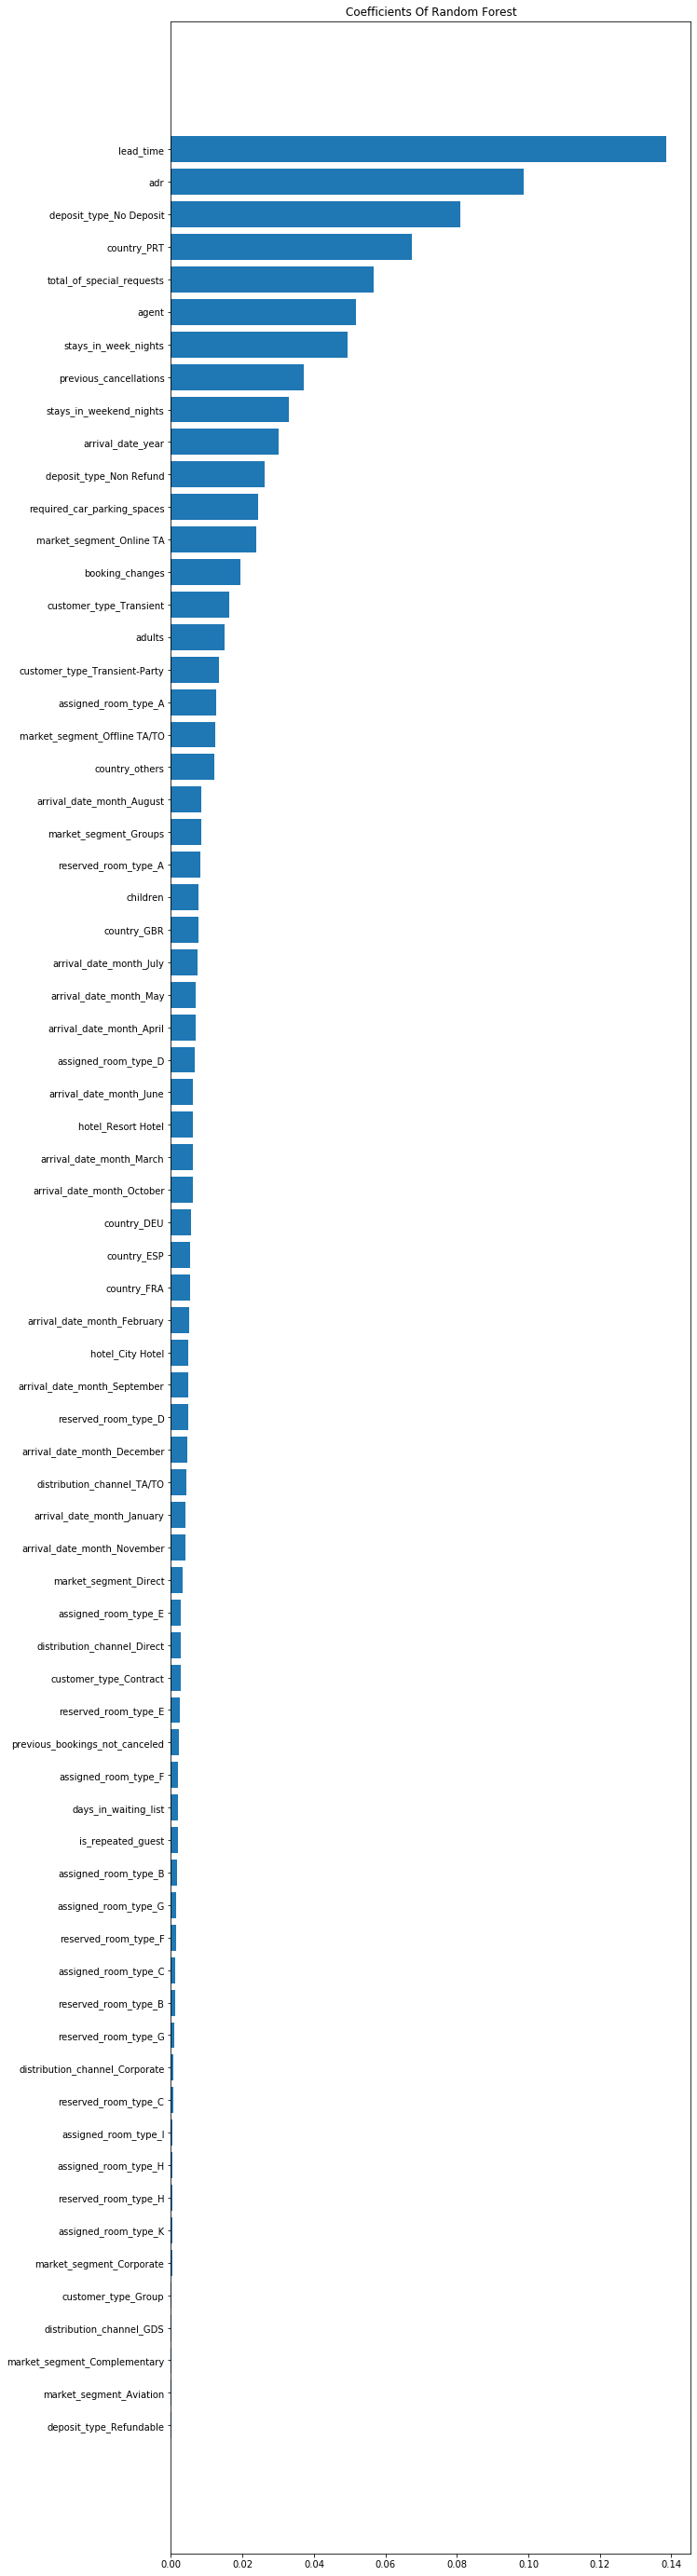

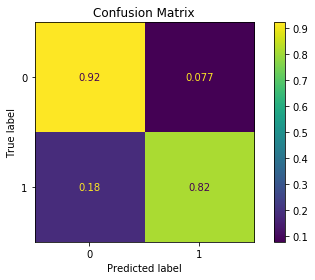

In [36]:
# Building a Random forest classifier using best hyperparameters obtain from the grid search
model(hotel_data_X,hotel_data_Y,RandomForestClassifier(criterion = 'entropy', n_estimators = 20),"Random Forest", f_i = True)

## Feature Selection

In [37]:
hotel_data_X.sort_values('adr')['adr']

14969       -6.38
18005        0.00
78359        0.00
78276        0.00
78257        0.00
           ...   
39155      426.25
13391      437.00
13142      450.00
111403     510.00
48515     5400.00
Name: adr, Length: 102894, dtype: float64

In [38]:
hotel_data_X = hotel_data_X.drop(index=14969)
hotel_data_Y = hotel_data_Y.drop(index=14969)

In [46]:
#selecting K best features using SelectKBest Function
accuracy_SKB = []
para_SKB = []
sensitivity = []
specificity = []
x_train, x_test, y_train, y_test = train_test_split(hotel_data_X, hotel_data_Y, test_size = 0.3) 
for c in range(5, 35):
    chi_SKB = SelectKBest(chi2, k = c)
    hotel_data_chi_SKB = chi_SKB.fit_transform(x_train, y_train)
    true_false_SKB = chi_SKB.get_support()
    indices_SKB = []
    for i, j in enumerate(true_false_SKB):
        if j:
            indices_SKB.append(i)
    
    para = list(x_train.columns[indices_SKB])
    para_SKB.append(para)
    model_LR = RandomForestClassifier()
    model_LR.fit(hotel_data_chi_SKB, y_train)
    x_test_SKB = x_test.iloc[:, indices_SKB]
    pre = model_LR.predict(x_test_SKB)
    acc = accuracy_score(y_test, pre)
    accuracy_SKB.append(acc)
    index = list(np.arange(5,35,1))
SKB = pd.DataFrame(list(zip(index, para_SKB, accuracy_SKB)),
              columns=['K','parameters', 'accuracy'])

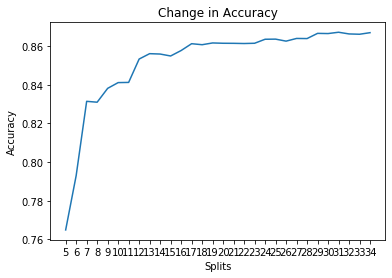

In [47]:
#plotting a line graph to interpret how many important variables are requried to build a model with a similar accuracy.
plt.plot(SKB['K'], SKB['accuracy'])
plt.xticks(SKB['K'])
plt.title("Change in Accuracy")
plt.xlabel("Splits")
plt.ylabel("Accuracy")
plt.show()

In [71]:
#Implementing RFE to select the best features.
accuracy_RFE = []
para_RFE = []
for i in range(5, 15):    
    rfe = RFE(RandomForestClassifier(), n_features_to_select = i)
    rfe = rfe.fit(x_train, y_train)
    pred = rfe.predict(x_test)
    accuracy_RFE.append(accuracy_score(y_test, pred))
    true_false_RFE = rfe.support_
    k = []
    for x, y in enumerate(true_false_RFE):
        if y:
            k.append(x)
    para = list(x_train.columns[k])
    para_RFE.append(para)
index = list(np.arange(5,15,1))
RFE = pd.DataFrame(list(zip(index, para_RFE, accuracy_RFE)),
              columns=['K','parameters', 'accuracy'])

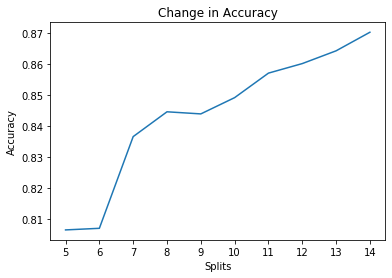

In [72]:
#plotting a line graph to interpret how many important variables are requried to build a model with a similar accuracy.
plt.plot(RFE['K'], RFE['accuracy'])
plt.xticks(RFE['K'])
plt.title("Change in Accuracy")
plt.xlabel("Splits")
plt.ylabel("Accuracy")
plt.show()

In [48]:
SKB[SKB['K'] == 14]['parameters'].tolist()

[['lead_time',
  'previous_cancellations',
  'previous_bookings_not_canceled',
  'booking_changes',
  'agent',
  'days_in_waiting_list',
  'adr',
  'required_car_parking_spaces',
  'total_of_special_requests',
  'country_FRA',
  'country_PRT',
  'market_segment_Groups',
  'deposit_type_No Deposit',
  'deposit_type_Non Refund']]

### So, These are the important variables that are requried to build a model with a similar accuracy.